# Data Munging and Preprocessing Practice

In [1]:
import os
import pandas as pd
import numpy as np
import sklearn as skl

In [2]:
os.getcwd()

'C:\\Users\\Andrew\\Desktop\\Rockhurst University\\SS18\\BIA 6303 Predictive Models\\Homework\\Assignment #1'

In [3]:
#Load Auto csv file and define data frame and specify that strings with a comma are integers
Auto = pd.read_csv('AUTO.csv', encoding = 'cp1252', thousands = ',')
Auto

,Name,Drive Type,Mileage (mpg),Fuel Type,Capacity (gal),Length (inches),Wheel Base (inches),Width (inches),Turning Circle (feet),Weight (lbs),Door Top (inches),Luggage (cu. ft.),Front Shoulder (inches),Front Leg Room (inches),Front Head Room (inches),Rear Shoulder (inches),Rear Leg Room (inches),Rear Head Room (inches)
0,Acura Integra,Front,31,Regular,13.2,172,101,67,39,2635,47.5,13.0,51.5,41.5,2.0,46.5,25.0,0.5
1,Acura TL,Front,22,Premium,17.1,193,108,70,40,3460,50.0,14.0,56.0,40.5,2.5,55.0,27.0,2.0
2,Buick Century,Front,22,Regular,17.5,195,109,73,40,3350,50.5,17.0,58.0,44.0,5.0,57.0,30.0,2.0
3,Buick LeSabre,Front,20,Regular,17.5,200,112,74,42,3640,51.0,18.0,59.5,40.5,5.0,58.0,27.5,4.5
4,Buick Park Avenue,Front,21,Regular,18.5,207,114,75,43,3880,51.0,19.0,59.5,42.5,6.0,58.5,31.5,3.0
5,Buick Regal,Front,21,Regular,17.5,196,109,73,40,3325,50.5,17.0,58.0,43.0,5.0,56.5,29.0,2.5
6,Chevrolet Cavalier,Front,26,Regular,15.2,181,104,68,38,2795,50.5,14.0,54.5,41.5,4.5,53.5,28.0,2.0
7,Chevrolet Impala,Front,20,Regular,17.0,200,111,73,40,3495,51.5,18.0,58.5,42.0,5.0,58.5,29.0,2.5
8,Chevrolet Lumina,Front,22,Regular,16.6,201,108,73,44,3350,51.0,16.0,58.5,42.5,4.5,57.0,30.0,2.0
9,Chevrolet Malibu,Front,24,Regular,15.2,190,107,69,40,3075,50.5,17.0,55.0,43.0,4.5,54.0,30.5,2.0


In [4]:
#Print the columns that contain null values
null_counts = Auto.isnull().sum()
null_counts[null_counts > 0].sort_values(ascending = False)
null_data = Auto[Auto.isnull().any(axis=1)]
null_data

,Name,Drive Type,Mileage (mpg),Fuel Type,Capacity (gal),Length (inches),Wheel Base (inches),Width (inches),Turning Circle (feet),Weight (lbs),Door Top (inches),Luggage (cu. ft.),Front Shoulder (inches),Front Leg Room (inches),Front Head Room (inches),Rear Shoulder (inches),Rear Leg Room (inches),Rear Head Room (inches)
87,Ford F-150,Rear,15,Regular,25.0,226,139,80,49,5210,70.5,NaN,63.5,42.0,7.0,60.0,24.5,2.5
88,Ford Ranger,Rear,18,Regular,20.0,202,126,70,45,3870,60.0,NaN,54.0,42.5,5.0,18.0,22.5,2.0


In [5]:
#Find the median value of the 'Luggage (cu. ft.)" column
Auto.loc[:,"Luggage (cu. ft.)"].median()

16.0

In [6]:
#Fill NaN values with median value of 16
Auto = Auto.fillna(value = 16)

In [7]:
#Explore general characteristics of the data by computing the means and standard deviations of numerical attributes
Auto.describe()

,Mileage (mpg),Capacity (gal),Length (inches),Wheel Base (inches),Width (inches),Turning Circle (feet),Weight (lbs),Door Top (inches),Luggage (cu. ft.),Front Shoulder (inches),Front Leg Room (inches),Front Head Room (inches),Rear Shoulder (inches),Rear Leg Room (inches),Rear Head Room (inches)
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
mean,21.292453,17.883019,187.594340,107.632075,70.915094,39.849057,3502.311321,53.891509,25.056604,56.471698,41.254717,4.287736,54.745283,28.363208,3.023585
std,3.769469,3.425714,12.493639,7.014713,3.237041,2.797252,633.453939,5.747465,18.235538,3.041640,1.021775,1.279784,7.110437,2.196895,1.370405
min,13.000000,12.100000,152.000000,93.000000,66.000000,34.000000,2420.000000,46.500000,10.000000,51.500000,39.000000,1.500000,6.500000,22.500000,0.000000
25%,19.000000,15.825000,178.000000,103.000000,68.000000,38.000000,3106.250000,50.000000,14.000000,54.000000,40.500000,3.500000,52.625000,27.000000,2.000000
50%,21.000000,17.400000,188.000000,107.000000,70.000000,40.000000,3395.000000,51.000000,16.000000,56.000000,41.000000,4.500000,56.000000,28.500000,3.000000
75%,23.000000,19.000000,195.000000,112.000000,73.000000,41.000000,3890.000000,60.000000,30.750000,58.500000,42.000000,5.000000,57.000000,30.000000,4.000000
max,31.000000,30.000000,226.000000,139.000000,80.000000,49.000000,5850.000000,70.500000,76.000000,63.500000,44.000000,8.000000,64.500000,34.000000,6.000000


In [8]:
#Replace typos and insert into current column of data frame
Auto['Fuel Type'] = Auto['Fuel Type'].replace("Regular ", "Regular")

In [9]:
#Distribution of Drive Type
Auto['Drive Type'].value_counts().plot(kind='bar')

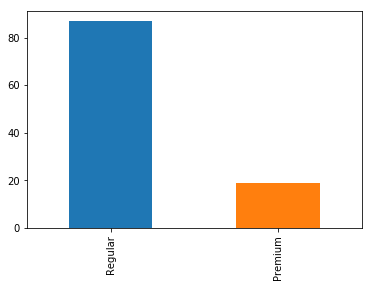

In [10]:
#Distribution of Fuel Type
Auto['Fuel Type'].value_counts().plot(kind='bar')

In [11]:
#Normalize the weight column of the dataframe and compare the normalized and regular weight values
normalized_Weight = (Auto['Weight (lbs)'] - Auto['Weight (lbs)'].min())/(Auto['Weight (lbs)'].max()-Auto['Weight (lbs)'].min())
Weight_compared = pd.concat([Auto['Weight (lbs)'], normalized_Weight], axis = 1)
Weight_compared

,Weight (lbs),Weight (lbs)
0,2635,0.062682
1,3460,0.303207
2,3350,0.271137
3,3640,0.355685
4,3880,0.425656
5,3325,0.263848
6,2795,0.109329
7,3495,0.313411
8,3350,0.271137
9,3075,0.190962


In [12]:
#Create dummy variables for both Drive and Fuel Types
Auto = pd.concat([Auto, pd.get_dummies(Auto['Drive Type'])], axis = 1)
Auto = pd.concat([Auto, pd.get_dummies(Auto['Fuel Type'])], axis = 1)
Auto

,Name,Drive Type,Mileage (mpg),Fuel Type,Capacity (gal),Length (inches),Wheel Base (inches),Width (inches),Turning Circle (feet),Weight (lbs),...,Front Shoulder (inches),Front Leg Room (inches),Front Head Room (inches),Rear Shoulder (inches),Rear Leg Room (inches),Rear Head Room (inches),Front,Rear,Premium,Regular
0,Acura Integra,Front,31,Regular,13.2,172,101,67,39,2635,...,51.5,41.5,2.0,46.5,25.0,0.5,1,0,0,1
1,Acura TL,Front,22,Premium,17.1,193,108,70,40,3460,...,56.0,40.5,2.5,55.0,27.0,2.0,1,0,1,0
2,Buick Century,Front,22,Regular,17.5,195,109,73,40,3350,...,58.0,44.0,5.0,57.0,30.0,2.0,1,0,0,1
3,Buick LeSabre,Front,20,Regular,17.5,200,112,74,42,3640,...,59.5,40.5,5.0,58.0,27.5,4.5,1,0,0,1
4,Buick Park Avenue,Front,21,Regular,18.5,207,114,75,43,3880,...,59.5,42.5,6.0,58.5,31.5,3.0,1,0,0,1
5,Buick Regal,Front,21,Regular,17.5,196,109,73,40,3325,...,58.0,43.0,5.0,56.5,29.0,2.5,1,0,0,1
6,Chevrolet Cavalier,Front,26,Regular,15.2,181,104,68,38,2795,...,54.5,41.5,4.5,53.5,28.0,2.0,1,0,0,1
7,Chevrolet Impala,Front,20,Regular,17.0,200,111,73,40,3495,...,58.5,42.0,5.0,58.5,29.0,2.5,1,0,0,1
8,Chevrolet Lumina,Front,22,Regular,16.6,201,108,73,44,3350,...,58.5,42.5,4.5,57.0,30.0,2.0,1,0,0,1
9,Chevrolet Malibu,Front,24,Regular,15.2,190,107,69,40,3075,...,55.0,43.0,4.5,54.0,30.5,2.0,1,0,0,1


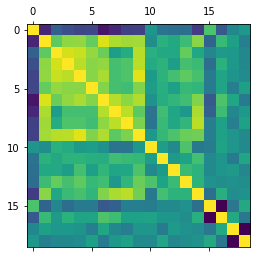

In [13]:
#Basic correlation analysis in visual format
import matplotlib.pyplot as plt
plt.matshow(Auto.corr())
AutoCorr = Auto.corr()

In [14]:
#Basic correlation analysis in numeric format
AutoCorr = Auto.corr()
AutoCorr

,Mileage (mpg),Capacity (gal),Length (inches),Wheel Base (inches),Width (inches),Turning Circle (feet),Weight (lbs),Door Top (inches),Luggage (cu. ft.),Front Shoulder (inches),Front Leg Room (inches),Front Head Room (inches),Rear Shoulder (inches),Rear Leg Room (inches),Rear Head Room (inches),Front,Rear,Premium,Regular
Mileage (mpg),1.000000,-0.787515,-0.387151,-0.512751,-0.578650,-0.571132,-0.875434,-0.771332,-0.619985,-0.607314,0.053420,-0.236747,-0.269556,-0.274588,-0.654005,0.434247,-0.434247,-0.069210,0.069210
Capacity (gal),-0.787515,1.000000,0.505427,0.660131,0.678437,0.526678,0.888074,0.752458,0.716461,0.722434,-0.014806,0.274185,0.213711,0.371609,0.647434,-0.355375,0.355375,0.134342,-0.134342
Length (inches),-0.387151,0.505427,1.000000,0.869492,0.832541,0.684696,0.550863,0.117489,0.240717,0.787516,0.268169,0.203634,0.203753,0.530583,0.200537,-0.077100,0.077100,0.062718,-0.062718
Wheel Base (inches),-0.512751,0.660131,0.869492,1.000000,0.791321,0.641709,0.678488,0.411330,0.448967,0.790025,0.232445,0.294628,0.116297,0.407676,0.361039,-0.274368,0.274368,0.066904,-0.066904
Width (inches),-0.578650,0.678437,0.832541,0.791321,1.000000,0.642269,0.743765,0.403390,0.450949,0.909002,0.091544,0.294469,0.400622,0.501899,0.416956,-0.166388,0.166388,0.035219,-0.035219
Turning Circle (feet),-0.571132,0.526678,0.684696,0.641709,0.642269,1.000000,0.625479,0.413344,0.384132,0.624658,0.116876,0.251681,0.138586,0.340659,0.315220,-0.165816,0.165816,-0.133687,0.133687
Weight (lbs),-0.875434,0.888074,0.550863,0.678488,0.743765,0.625479,1.000000,0.777217,0.656608,0.762697,0.022551,0.242911,0.319833,0.388947,0.624352,-0.437678,0.437678,0.187499,-0.187499
Door Top (inches),-0.771332,0.752458,0.117489,0.411330,0.403390,0.413344,0.777217,1.000000,0.803932,0.498575,-0.240942,0.388512,0.175732,0.065755,0.742755,-0.379593,0.379593,-0.066383,0.066383
Luggage (cu. ft.),-0.619985,0.716461,0.240717,0.448967,0.450949,0.384132,0.656608,0.803932,1.000000,0.603918,-0.222359,0.358312,0.201275,0.314236,0.791403,-0.146421,0.146421,-0.143753,0.143753
Front Shoulder (inches),-0.607314,0.722434,0.787516,0.790025,0.909002,0.624658,0.762697,0.498575,0.603918,1.000000,0.063630,0.329347,0.441564,0.550277,0.570227,-0.148338,0.148338,0.044993,-0.044993


In [15]:
#Perform Principal Component Analysis (PCA) to see how much variation is captured in 3 principal components
x = AutoCorr
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])
principalDf

,principal component 1,principal component 2,principal component 3
0,3.608550,0.197835,-0.129417
1,-1.301123,0.061039,-0.221735
2,-0.606000,0.134178,0.925166
3,-0.975062,0.133864,0.511368
4,-1.067090,-0.019334,0.570893
5,-0.699802,-0.199063,0.372542
6,-1.430603,0.193784,-0.168360
7,-0.952842,-0.289824,-0.890865
8,-0.859334,-0.539300,-0.539636
9,-1.201783,-0.106673,0.455887


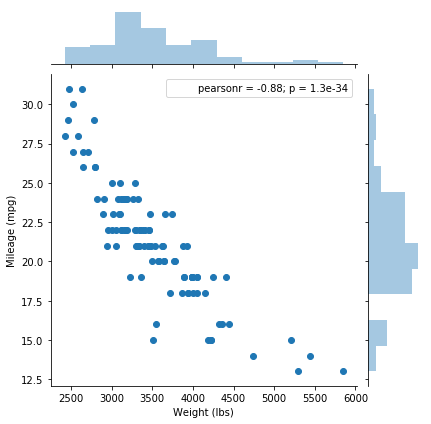

In [18]:
#Jointplot of Weight v Mileage using seaborn (non-normalized data)
import seaborn as sns
x = Auto['Weight (lbs)']
y = Auto['Mileage (mpg)']
sns.jointplot(x = x, y = y, data = Auto);

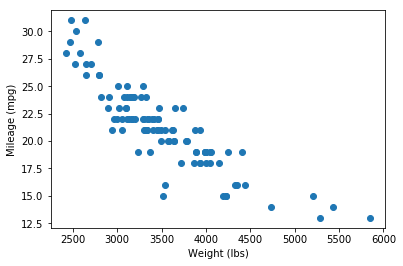

In [19]:
#Scatterplot of Weight v Mileage using matplotlib
import matplotlib.pyplot as plt
x = Auto['Weight (lbs)']
y = Auto['Mileage (mpg)']
plt.scatter(x, y)
plt.xlabel("Weight (lbs)")
plt.ylabel("Mileage (mpg)")
plt.show()

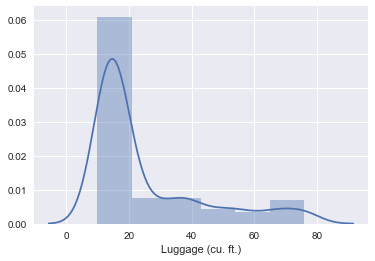

In [20]:
#Non-normalized histogram for Luggage feature of data
import seaborn as sns
sns.set(color_codes = True)
x = Auto['Luggage (cu. ft.)']
sns.distplot(x, bins = 6)

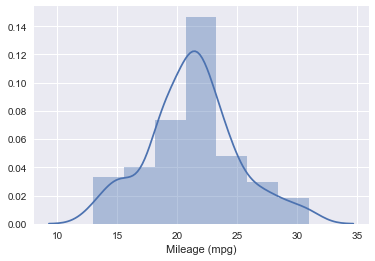

In [21]:
#Non-normalized histogram for Mileage feature of data
sns.set(color_codes = True)
x = Auto['Mileage (mpg)']
sns.distplot(x, bins = 7)

In [22]:
#Perform cross-tabluation of Fuel Type (x2) and Drive Type (x2) variables
Regular = Auto['Regular']
Premium = Auto['Premium']
Front = Auto['Front']
Rear = Auto['Rear']
pd.crosstab([Regular, Premium], [Front, Rear], rownames=['Regular', 'Premium'], colnames=['Front', 'Rear'])

,Front,0,1
,Rear,1,0
Regular,Premium,,
0,1,8,11
1,0,17,70


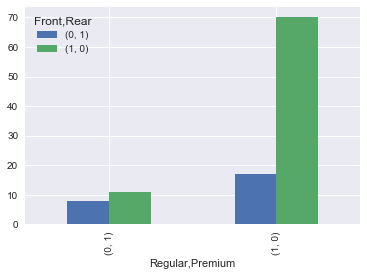

In [23]:
#Use matplotlib to create a bar chart graph to visualize the relationships betweem factor variables
tab = pd.crosstab([Regular, Premium], [Front, Rear], rownames=['Regular', 'Premium'], colnames=['Front', 'Rear'])
tab.plot(kind='bar', stacked=False)
plt.show()

In [24]:
#Create Auto_sub dataframe containing observations categorized as using Regular fuel type and getting greater that 21 mpg, then add remaining factors from the queried observations
Auto_sub = Auto.loc[((Auto['Regular'] == 1) & (Auto['Mileage (mpg)'] > 21)), ['Regular', 'Mileage']]
Auto_sub
Auto_sub['Mileage'] = Auto['Mileage (mpg)']
Auto_sub['Capacity (gal)'] = Auto['Capacity (gal)']
Auto_sub['Length (inches)'] = Auto['Length (inches)']
Auto_sub['Wheel Base (inches)'] = Auto['Wheel Base (inches)']
Auto_sub['Width (inches)'] = Auto['Width (inches)']
Auto_sub['Turning Circle (feet)'] = Auto['Turning Circle (feet)']
Auto_sub['Weight (lbs)'] = Auto['Weight (lbs)']
Auto_sub['Door Top (inches)'] = Auto['Door Top (inches)']
Auto_sub['Luggage (cu. ft.)'] = Auto['Luggage (cu. ft.)']
Auto_sub['Front Shoulder (inches)'] = Auto['Front Shoulder (inches)']
Auto_sub['Front Leg Room (inches)'] = Auto['Front Leg Room (inches)']
Auto_sub['Front Head Room (inches)'] = Auto['Front Head Room (inches)']
Auto_sub['Rear Shoulder (inches)'] = Auto['Rear Shoulder (inches)']
Auto_sub['Rear Leg Room (inches)'] = Auto['Rear Leg Room (inches)']
Auto_sub['Rear Head Room (inches)'] = Auto['Rear Head Room (inches)']
Auto_sub['Front'] = Auto['Front']
Auto_sub['Rear'] = Auto['Rear']
Auto_sub

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1367: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,Regular,Mileage,Capacity (gal),Length (inches),Wheel Base (inches),Width (inches),Turning Circle (feet),Weight (lbs),Door Top (inches),Luggage (cu. ft.),Front Shoulder (inches),Front Leg Room (inches),Front Head Room (inches),Rear Shoulder (inches),Rear Leg Room (inches),Rear Head Room (inches),Front,Rear
0,1,31,13.2,172,101,67,39,2635,47.5,13.0,51.5,41.5,2.0,46.5,25.0,0.5,1,0
2,1,22,17.5,195,109,73,40,3350,50.5,17.0,58.0,44.0,5.0,57.0,30.0,2.0,1,0
6,1,26,15.2,181,104,68,38,2795,50.5,14.0,54.5,41.5,4.5,53.5,28.0,2.0,1,0
8,1,22,16.6,201,108,73,44,3350,51.0,16.0,58.5,42.5,4.5,57.0,30.0,2.0,1,0
9,1,24,15.2,190,107,69,40,3075,50.5,17.0,55.0,43.0,4.5,54.0,30.5,2.0,1,0
10,1,31,13.2,175,97,67,34,2480,48.0,12.0,52.5,40.5,4.0,52.0,26.5,2.0,1,0
13,1,22,16.0,186,108,72,39,3170,49.0,16.0,55.0,42.0,4.0,54.5,31.0,1.5,1,0
17,1,24,15.8,184,105,70,41,3185,50.0,14.0,55.5,42.5,2.5,52.5,30.0,3.5,1,0
18,1,24,13.7,175,101,67,37,2815,50.0,13.0,53.5,41.0,4.5,52.5,27.5,3.0,1,0
19,1,22,17.0,204,113,75,40,3455,49.0,18.0,58.5,43.0,4.5,57.0,32.5,2.5,1,0
